In [136]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import os
import pandas as pd
from desitarget.targetmask import desi_mask, bgs_mask, mws_mask

# 1. List all the tiles that have been observed so far

In [191]:
observed_tiles = pd.read_csv("/global/cfs/cdirs/desi/spectro/redux/daily/tiles-daily.csv")

In [192]:
observed_tiles

,TILEID,SURVEY,PROGRAM,FAPRGRM,FAFLAVOR,NEXP,EXPTIME,TILERA,TILEDEC,EFFTIME_ETC,...,EFFTIME_GFA,GOALTIME,OBSSTATUS,LRG_EFFTIME_DARK,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GOALTYPE,MINTFRAC,LASTNIGHT
0,70004,unknown,NaN,unknown,unknown,4,3600.0,116.0000,20.7000,0.0,...,0.0,1000.0,obsend,3470.8,3619.8,3784.0,3056.6,unknown,0.90,20200219
1,70508,unknown,NaN,unknown,unknown,6,1800.0,133.4125,11.6818,0.0,...,0.0,1000.0,obsstart,93.6,108.5,95.7,50.6,unknown,0.90,20200225
2,70506,unknown,NaN,unknown,unknown,3,900.0,133.4125,11.6818,0.0,...,0.0,1000.0,obsstart,53.6,61.6,54.9,33.7,unknown,0.90,20200225
3,70512,unknown,NaN,unknown,unknown,7,3150.0,132.8500,12.3200,0.0,...,0.0,1000.0,obsstart,351.9,389.8,364.7,227.2,unknown,0.90,20200226
4,70514,unknown,NaN,unknown,unknown,16,1680.0,132.8500,12.3200,0.0,...,0.0,1000.0,obsstart,112.0,118.3,120.2,74.4,unknown,0.90,20200227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,23551,main,bright,bright,mainbright,2,876.9,255.7730,5.6410,166.7,...,198.3,180.0,obsend,192.7,227.9,197.7,98.7,bright,0.85,20220404
5361,1447,main,dark,dark,maindark,1,1441.3,171.1470,1.2300,1006.5,...,1003.3,1000.0,obsend,1011.3,1020.3,994.2,1197.7,dark,0.85,20220404
5362,23553,main,bright,bright,mainbright,1,489.1,253.4460,3.2400,96.1,...,112.1,180.0,obsstart,93.0,115.5,98.5,59.2,bright,0.85,20220404
5363,9287,main,dark,dark,maindark,1,1376.0,161.3450,4.4270,1010.0,...,967.6,1000.0,obsend,999.7,1030.8,974.1,1137.3,dark,0.85,20220404


In [193]:
# Define the fiberassign flavor
faflavor = 'maindark'
#faflavor = 'mainbright'
ii = (observed_tiles['FAFLAVOR'] == faflavor) & (observed_tiles['OBSSTATUS']=='obsend')
observed_tiles = observed_tiles[ii]
observed_tiles

,TILEID,SURVEY,PROGRAM,FAPRGRM,FAFLAVOR,NEXP,EXPTIME,TILERA,TILEDEC,EFFTIME_ETC,...,EFFTIME_GFA,GOALTIME,OBSSTATUS,LRG_EFFTIME_DARK,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GOALTYPE,MINTFRAC,LASTNIGHT
975,1404,main,NaN,dark,maindark,2,1987.0,248.170,3.391,1001.1,...,1044.0,1000.0,obsend,1101.5,1111.3,1195.9,1189.9,dark,0.85,20210514
977,1750,main,NaN,dark,maindark,1,771.2,246.825,34.183,1016.4,...,1033.8,1000.0,obsend,1063.9,1056.7,1180.2,1203.3,dark,0.85,20210514
978,1433,main,NaN,dark,maindark,2,2352.2,256.400,5.273,1004.0,...,1124.3,1000.0,obsend,1276.9,1375.9,1331.2,992.7,dark,0.85,20210514
981,2196,main,NaN,dark,maindark,3,3560.0,214.298,34.258,0.0,...,1091.4,1000.0,obsend,919.2,910.8,1005.9,991.7,dark,0.85,20210514
985,2175,main,NaN,dark,maindark,3,3342.7,186.092,33.400,1004.8,...,1081.7,1000.0,obsend,941.7,916.3,1067.0,1310.5,dark,0.85,20210514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5356,11497,main,dark,dark,maindark,1,1443.9,192.719,-4.298,1004.3,...,957.6,1000.0,obsend,973.9,992.7,976.6,1318.2,dark,0.85,20220404
5357,11921,main,dark,dark,maindark,1,1184.6,157.384,4.146,1002.9,...,964.7,1000.0,obsend,1005.2,1027.1,977.2,1236.9,dark,0.85,20220404
5358,11931,main,dark,dark,maindark,1,1621.7,148.717,2.903,1003.8,...,1045.5,1000.0,obsend,1086.9,1125.0,1057.3,1225.5,dark,0.85,20220404
5361,1447,main,dark,dark,maindark,1,1441.3,171.147,1.230,1006.5,...,1003.3,1000.0,obsend,1011.3,1020.3,994.2,1197.7,dark,0.85,20220404


In [194]:
set(observed_tiles['OBSSTATUS'])

{'obsend'}

# 2. Define a region of interest and keep all the tiles around that region with a 1.5 degree buffer

In [195]:
min_ra = 129.0
min_dec = -6.0
max_ra = 146.0
max_dec = 2
buffer = 1.5


ii = observed_tiles['TILERA']>(min_ra-buffer)
ii &= observed_tiles['TILERA']<(max_ra+buffer)
ii &= observed_tiles['TILEDEC']>(min_dec-buffer)
ii &= observed_tiles['TILEDEC']<(max_dec+buffer)

observed_tiles = observed_tiles[ii]

In [196]:
observed_tiles

,TILEID,SURVEY,PROGRAM,FAPRGRM,FAFLAVOR,NEXP,EXPTIME,TILERA,TILEDEC,EFFTIME_ETC,...,EFFTIME_GFA,GOALTIME,OBSSTATUS,LRG_EFFTIME_DARK,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GOALTYPE,MINTFRAC,LASTNIGHT
2461,10370,main,NaN,dark,maindark,1,1113.9,140.674,2.298,1000.7,...,972.0,1000.0,obsend,903.1,960.8,920.0,1297.6,dark,0.85,20211103
2484,7252,main,NaN,dark,maindark,1,1419.3,136.194,-6.255,1005.0,...,934.7,1000.0,obsend,953.6,966.0,953.6,1342.7,dark,0.85,20211104
2493,4103,main,NaN,dark,maindark,1,1308.1,132.577,-7.115,1006.8,...,949.5,1000.0,obsend,974.3,979.9,973.0,1359.5,dark,0.85,20211104
2496,4854,main,NaN,dark,maindark,1,1213.8,128.818,-5.356,1005.3,...,989.6,1000.0,obsend,960.6,976.4,953.1,1350.2,dark,0.85,20211104
2526,4101,main,NaN,dark,maindark,1,1222.0,140.888,-4.260,1005.8,...,972.1,1000.0,obsend,976.8,1015.9,997.5,1699.0,dark,0.85,20211105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,5638,main,dark,dark,maindark,1,1039.2,144.502,2.406,1005.3,...,890.0,1000.0,obsend,1001.4,1063.7,935.4,1125.3,dark,0.85,20220323
5093,8787,main,dark,dark,maindark,1,1079.8,141.176,0.695,1009.1,...,995.9,1000.0,obsend,1013.5,1062.0,956.8,1245.1,dark,0.85,20220323
5109,5648,main,dark,dark,maindark,1,1012.1,141.185,2.875,1011.7,...,962.1,1000.0,obsend,1002.7,1058.2,943.4,1065.8,dark,0.85,20220324
5139,2514,main,dark,dark,maindark,2,2667.9,145.802,1.840,1002.8,...,842.9,1000.0,obsend,1046.9,1086.9,1009.5,720.1,dark,0.85,20220326


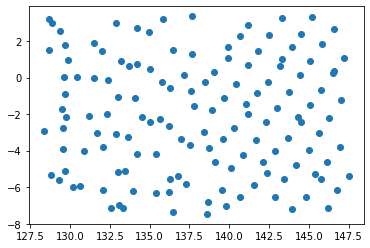

In [197]:
plt.scatter(observed_tiles['TILERA'], observed_tiles['TILEDEC'])

(array([14., 56., 36.,  9., 12.,  3.,  5.,  2.,  1.,  1.]),
 array([ 873.2,  929.9,  986.6, 1043.3, 1100. , 1156.7, 1213.4, 1270.1,
        1326.8, 1383.5, 1440.2]),
 <BarContainer object of 10 artists>)

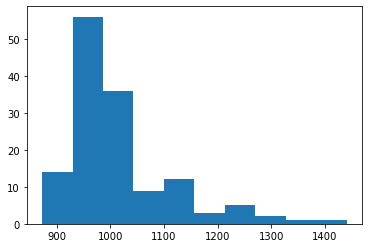

In [198]:
plt.hist(observed_tiles['LRG_EFFTIME_DARK'])

# 3 . Read all the redrock outputs for those tiles



In [199]:
z = []
fba = []
exp_fba = []
target = []

for i in range(len(observed_tiles)):
    tileid = observed_tiles.iloc[i]['TILEID']
    lastnight = observed_tiles.iloc[i]['LASTNIGHT']
    rr_path = os.path.join("/global/cfs/cdirs/desi/spectro/redux/daily/tiles/cumulative/", 
                        "{}".format(tileid), "{}".format(lastnight))
    target_path = os.path.join("/global/cfs/cdirs/desi/survey/fiberassign/main/",
                              "{:03d}".format(tileid//1000))
    # gather all targets
    try:
        target_file = os.path.join(target_path, "{:06d}-targ.fits".format(tileid))
        target.append(fitsio.read(target_file))
    except:
        print('failed for targets', tileid)
    
    # gather all redrock outputs
    for petal in range(10):
        redrock_file = os.path.join(rr_path, "redrock-{}-{}-thru{}.fits".format(petal, tileid, lastnight))
        try:
            z.append(fitsio.read(redrock_file, ext="REDSHIFTS"))
            fba.append(fitsio.read(redrock_file, ext="FIBERMAP"))
            exp_fba.append(fitsio.read(redrock_file, ext="EXP_FIBERMAP"))
        except:
            print("failed for", petal, tileid, lastnight)
data_z = np.hstack(z)
data_fba = np.hstack(fba)
data_exp_fba = np.hstack(exp_fba)
data_target = np.hstack(target)

failed for 7 8777 20220104


In [200]:
# unique target ids

_, unique_ii = np.unique(data_target['TARGETID'], return_index=True)
data_target = data_target[unique_ii]

#_, unique_ii = np.unique(data_fba['TARGETID'], return_index=True)
#data_fba = data_fba[unique_ii]

#_, unique_ii = np.unique(data_z['TARGETID'], return_index=True)
#data_z = data_z[unique_ii]

#_, unique_ii = np.unique(data_exp_fba['TARGETID'], return_index=True)
#data_exp_fba = data_exp_fba[unique_ii]


In [201]:
ii = data_target['RA']>(min_ra)
ii &= data_target['RA']<(max_ra)
ii &= data_target['DEC']>(min_dec)
ii &= data_target['DEC']<(max_dec)

data_target = data_target[ii]

#ii = data_fba['TARGET_RA']>(min_ra)
#ii &= data_fba['TARGET_RA']<(max_ra)
#ii &= data_fba['TARGET_DEC']>(min_dec)
#ii &= data_fba['TARGET_DEC']<(max_dec)

ii = np.isin(data_fba['TARGETID'], data_target['TARGETID'])
data_fba = data_fba[ii]

ii = np.isin(data_exp_fba['TARGETID'], data_target['TARGETID'])
data_exp_fba = data_exp_fba[ii]

ii = np.isin(data_z['TARGETID'], data_target['TARGETID'])
data_z = data_z[ii]

In [202]:
data_fba['TARGET_RA']

array([140.33981473, 140.44198217, 140.52695799, ..., 144.09628331,
       144.0502468 , 143.95954092])

444634


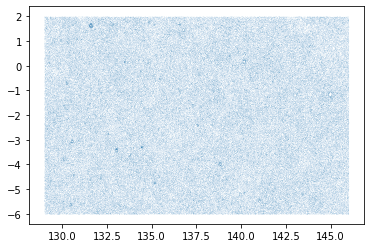

In [203]:
plt.scatter(data_target['RA'], data_target['DEC'], s=0.01, alpha=0.1)
print(len(data_target['RA']))

363534


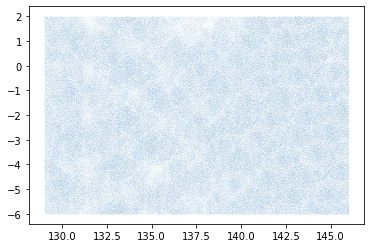

In [204]:
plt.scatter(data_fba['TARGET_RA'], data_fba['TARGET_DEC'], s=0.01, alpha=0.1)
print(len(data_fba['TARGET_RA']))

491245


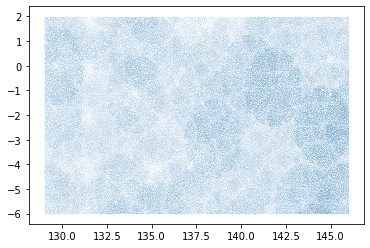

In [205]:
plt.scatter(data_exp_fba['FIBER_RA'], data_exp_fba['FIBER_DEC'], s=0.01, alpha=0.1)
print(len(data_exp_fba['FIBER_RA']))

310814


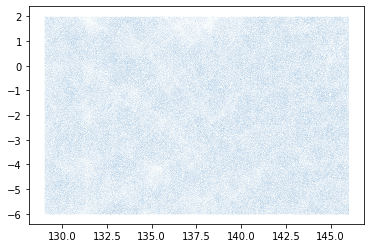

In [206]:
ii_z = np.isin(data_target['TARGETID'], data_z['TARGETID'])
plt.scatter(data_target['RA'][ii_z], data_target['DEC'][ii_z], s=0.01, alpha=0.1)
print(len(data_target['RA'][ii_z]))

In [207]:
area = (np.deg2rad(max_ra) - np.deg2rad(min_ra)) * (np.cos(np.deg2rad(90-max_dec)) - np.cos(np.deg2rad(90-min_dec)))
area = area*((180/np.pi)**2)
print(area)

135.80677209095052


In [211]:
is_good_z = data_z['ZWARN']==0

if faflavor == 'mainbright':
    targets = {'BGS_BRIGHT':'BGS_BRIGHT', 'BGS_FAINT':'BGS_FAINT', 
               'BGS_FAINT_HIP':'BGS_FAINT_HIP', 'BGS_WISE':'BGS_WISE', 'MWS_ANY':'MWS_ANY'}
    mask = bgs_mask
    target_mask = 'BGS_TARGET'
    format_header = '{}\t\t{}\t {}\t {}\t {}\t{}\t {}'.format('TARGET', 'NOBJ', 'NOBS', 'NGOODZ', 'DENS(OBJ)', 'FOBS', 'FGOODZ')
    format_data = '{} \t{:.0f}\t {:.0f}\t {:.0f}\t {:.0f}\t\t{:.3f}\t {:.3f}'
    
elif faflavor == 'maindark':

    targets = {'LRG':'LRG', 'ELG':'ELG', 'QSO':'QSO', #'QSO_LYA':'QSO', 
           'ELG_HIP':'ELG_HIP', 'ELG_LOP':'ELG_LOP', 'ELG_VLO': 'ELG_VLO', 'MWS_ANY':'MWS_ANY'}
    z_min = {'LRG':0.4, 'ELG':0.6, 'QSO_TRACER':0.0, 'QSO_LYA':2.1, 
        'ELG_LOP':0.6, 'ELG_HIP':0.6, 'ELG_VLO':0.6}

    z_max = {'LRG':1.1, 'ELG':1.6, 'QSO_TRACER':2.1, 'QSO_LYA':10.0,
        'ELG_LOP':1.6, 'ELG_HIP':1.6, 'ELG_VLO':1.6}
    mask = desi_mask
    target_mask = 'DESI_TARGET'
    format_header = '{}\t\t{}\t {}\t {}\t {}\t{}\t {}'.format('TARGET', 'NOBJ', 'NOBS', 'NGOODZ', 'DENS(OBJ)', 'FOBS', 'FGOODZ')
    format_data = '{}\t\t{:.0f}\t {:.0f}\t {:.0f}\t {:.0f}\t\t{:.3f}\t {:.3f}'
    
print(format_header)
for t in targets.keys():
    if t=='MWS_ANY' and faflavor=='mainbright':
        mask = desi_mask
        target_mask = 'DESI_TARGET'
    is_target = (data_target[target_mask] & mask[targets[t]])!=0
    
    #in fiberassign
    is_fba = np.isin(data_exp_fba['TARGETID'], data_target['TARGETID'][is_target])
    
    
    #with a redshift
    is_z = np.isin(data_z['TARGETID'], data_target['TARGETID'][is_target])
    n_unique_in_z = len(np.unique(data_z['TARGETID'][is_z]))
    n_good_unique = len(np.unique(data_z['TARGETID'][is_z & is_good_z]))
    n_target = np.count_nonzero(is_target) 
    
    print(format_data.format(t, n_target, n_unique_in_z, n_good_unique, n_target/area,
                                                        n_unique_in_z/n_target, n_good_unique/n_target))

TARGET		NOBJ	 NOBS	 NGOODZ	 DENS(OBJ)	FOBS	 FGOODZ
LRG		86217	 76914	 71460	 635		0.892	 0.829
ELG		318188	 203598	 113554	 2343		0.640	 0.357
QSO		38395	 38170	 17851	 283		0.994	 0.465
ELG_HIP		31862	 29395	 15204	 235		0.923	 0.477
ELG_LOP		254305	 176746	 94298	 1873		0.695	 0.371
ELG_VLO		63884	 26852	 19256	 470		0.420	 0.301
MWS_ANY		16495	 6957	 6423	 121		0.422	 0.389
